# Probabilidad

# Probabilidad Condicionada

In [1]:
# descarga de archivo
url="https://raw.githubusercontent.com/NechuBM/dataset/main/student-dataset.csv"
!wget {url} -q -O student-grades.csv

In [2]:
import pandas as pd
df = pd.read_csv('student-grades.csv', sep=';')

### Ejercicio 1

¿Cuál es la probabilidad de conseguir la nota deseada sabiendo que ha faltado más de n días?


*   Nota deseada: 60
*   Número de ausencias: 5

![](tres.png)

![](cuatro.png)

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df_prob =  df[['absences', 'G3']]

In [5]:
df_prob.head()

,absences,G3
0,4,11
1,2,11
2,6,12
3,0,14
4,0,13


In [6]:
df_prob.describe()

,absences,G3
count,649.000000,649.000000
mean,3.659476,11.906009
std,4.640759,3.230656
min,0.000000,0.000000
25%,0.000000,10.000000
50%,2.000000,12.000000
75%,6.000000,14.000000
max,32.000000,19.000000


array([[<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

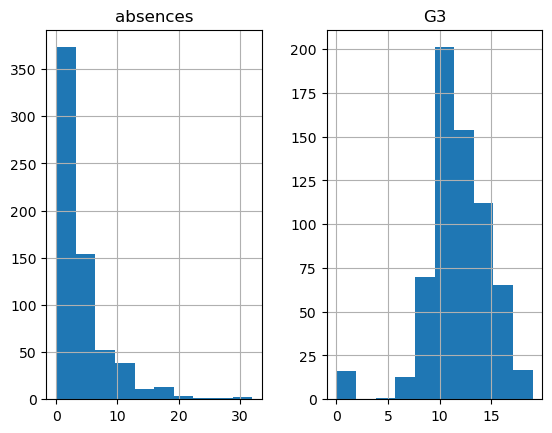

In [7]:
df_prob.hist()

<Axes: >

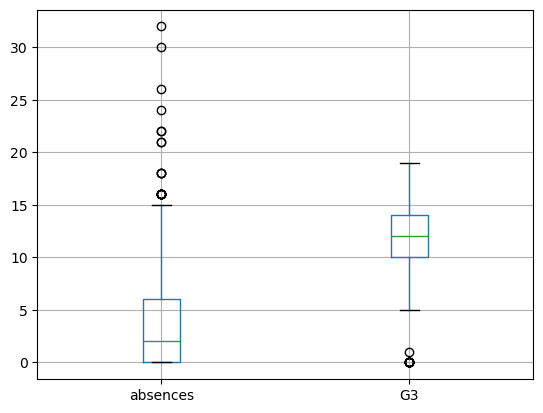

In [8]:
df_prob.boxplot()

In [9]:
# ¿Cuál es la probabilidad de conseguir la nota deseada sabiendo que ha faltado más de n días?
# Nota deseada: 60
# Número de asistencias: 5

df_prob = df[['absences', 'G3']].copy()
df_prob.head()

,absences,G3
0,4,11
1,2,11
2,6,12
3,0,14
4,0,13


In [10]:
df_prob['abs_count'] = df_prob['absences'].apply(lambda x: x > 5)
df_prob['abs_count'].head()

0    False
1    False
2     True
3    False
4    False
Name: abs_count, dtype: bool

In [11]:
prob_ausencias = df_prob['abs_count'].mean()
prob_ausencias

0.26348228043143296

In [12]:
df_prob['G3'] = df_prob['G3'].apply(lambda x: x * 5)

In [13]:
df_prob.head()

,absences,G3,abs_count
0,4,55,False
1,2,55,False
2,6,60,True
3,0,70,False
4,0,65,False


In [14]:
df_prob['g3_count'] = df_prob['G3'].apply(lambda x : x > 60)

In [15]:
prob_nota = df_prob['g3_count'].mean()
prob_nota

0.4252696456086287

In [17]:
df_prob[(df_prob['abs_count'] == True) & (df_prob['g3_count'] == True )].shape

(55, 4)

In [18]:
prob_inter = 55 / 649

In [19]:
prob_inter / prob_ausencias

0.3216374269005848

### Ejercicio 2

La columna 'goout' indica con un valor del 1 al 5 la frecuencia de salir con nuestros amigos siendo 1 'muy bajo' y 5 'muy alto'

¿Cuál es la probabilidad de conseguir la nota deseada sabiendo que tiene una vida social sana? <br>
Se entiende vida social sana cuando el valor de la columna 'goout' >= 3


![](cinco.png)

In [20]:
df_prob =  df[['goout', 'G3']]
df_prob.head()

,goout,G3
0,4,11
1,3,11
2,2,12
3,2,14
4,2,13


In [21]:
df_prob.describe()

,goout,G3
count,649.000000,649.000000
mean,3.184900,11.906009
std,1.175766,3.230656
min,1.000000,0.000000
25%,2.000000,10.000000
50%,3.000000,12.000000
75%,4.000000,14.000000
max,5.000000,19.000000


array([[<Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

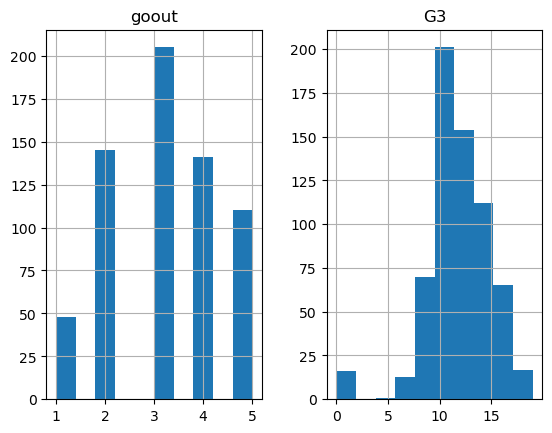

In [22]:
df_prob.hist()

<Axes: >

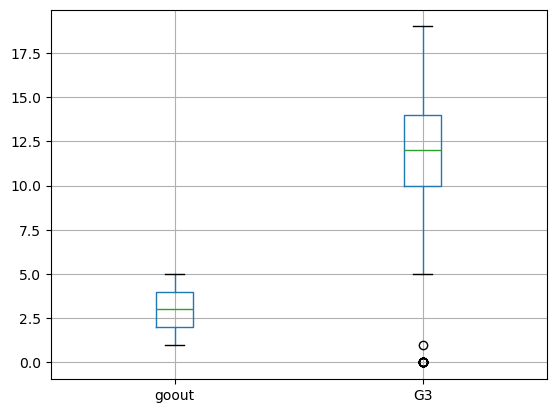

In [23]:
df_prob.boxplot()

In [24]:
"""
¿Cuál es la probabilidad de conseguir la nota deseada sabiendo que tiene una vida social sana?
Se entiende vida social sana cuando el valor de la columna 'goout' >= 3
"""
df_prob = df[['goout', 'G3']].copy()
df_prob.head()

,goout,G3
0,4,11
1,3,11
2,2,12
3,2,14
4,2,13


In [26]:
df_prob['goout_count'] = df_prob['goout'].apply(lambda x: x >= 3)
df_prob['goout_count'].head()

0     True
1     True
2    False
3    False
4    False
Name: goout_count, dtype: bool

In [27]:
prob_goout = df_prob['goout_count'].mean()
prob_goout

0.7026194144838213

In [28]:
df_prob['G3'] = df_prob['G3'].apply(lambda x: x * 5)
df_prob['g3_count'] = df_prob['G3'].apply(lambda x : x > 60)

In [32]:
df_prob['g3_count'].head()

0    False
1    False
2    False
3     True
4     True
Name: g3_count, dtype: bool

In [33]:
df_prob[(df_prob['goout_count'] == True) & (df_prob['g3_count'] == True )].shape

(183, 4)

In [34]:
prob_vida_social_inter_aprobar = 183 / 649

In [35]:
# La probabilidad de aprobar, dado que se tiene una vida social sana
prob_vida_social_inter_aprobar / prob_goout

0.4013157894736842